In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titanic_train = pd.read_csv('titanic/train.csv')
#titanic_test = pd.read_csv('titanic/test.csv')

In [5]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

def data_processing(df):
    # df = df.copy()
    # retrieving numerical and columnar datatypes
    num_cols = df.select_dtypes(['int64','float64']).columns
    cat_cols = df.select_dtypes(['object']).columns
    # Identifying duplicates
    df.duplicated().sum()
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    # Checking missing values
    df.isnull().sum().sum()
    # Drop missing values in categorical columns
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    # Drop missing values in numerical columns
    imputed_data = pd.DataFrame(imputer.fit_transform(df[num_cols]), columns = num_cols)
    df[num_cols] = imputed_data
    return df

In [11]:
train_processed = data_processing(titanic_train)
train_processed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,B96 B98,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,B96 B98,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,B96 B98,S


In [13]:
train_processed['Title'] = train_processed['Name'].str.split(",").str.get(1)
train_processed['Title'] = train_processed['Title'].str.split(".").str.get(0)
train_processed['Title'].str.strip()

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [15]:
# Dropping unwanted columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_processed.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True, errors='ignore')
# Encoding categorical columns
for col in ['Sex', 'Embarked', 'Title']:
    train_processed[col] = le.fit_transform(train_processed[col])

In [17]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
cols = train_processed.columns
scaled = pd.DataFrame(minmax.fit_transform(train_processed[cols]), columns=cols)
train_processed[cols] = scaled

In [19]:
train_processed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.6875
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.7500
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,1.0,0.5000
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,1.0,0.7500
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.6875


In [21]:
x = train_processed.drop(['Survived'], axis=1)
y = train_processed['Survived']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve

## Base Model Estimators

Score:  0.7963483146067416
Accuracy:  0.7877094972067039
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       110
         1.0       0.75      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179

Confusion matrix:  Axes(0.125,0.11;0.62x0.77)


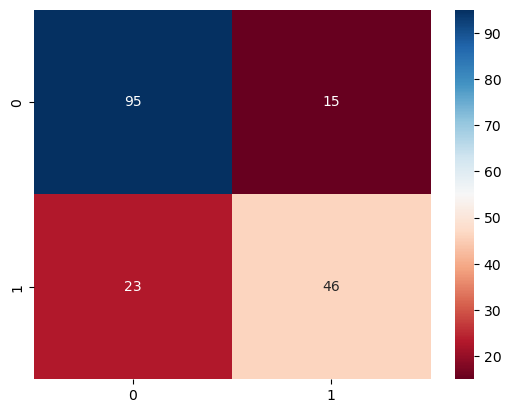

In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=0.1)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
print("Score: ", log_reg.score(x_train, y_train))
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion matrix: ", sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdBu'))

Score:  0.9199438202247191
Accuracy:  0.8044692737430168
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.87      0.85       110
         1.0       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion matrix:  Axes(0.125,0.11;0.62x0.77)


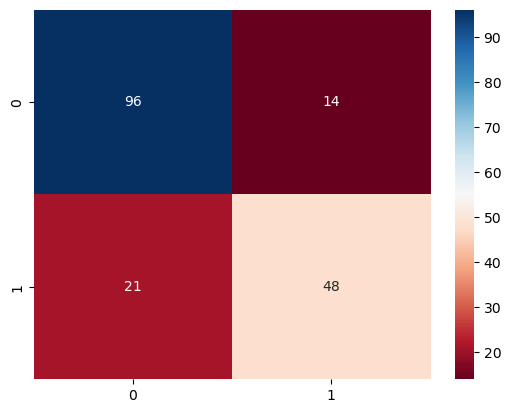

In [45]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=10,min_samples_split=8,random_state=42)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
print("Score: ", dtree.score(x_train, y_train))
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion matrix: ", sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdBu'))

Score:  0.8342696629213483
Accuracy:  0.770949720670391
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.77      0.90      0.83       110
         1.0       0.78      0.57      0.66        69

    accuracy                           0.77       179
   macro avg       0.77      0.73      0.74       179
weighted avg       0.77      0.77      0.76       179

Confusion matrix:  Axes(0.125,0.11;0.62x0.77)


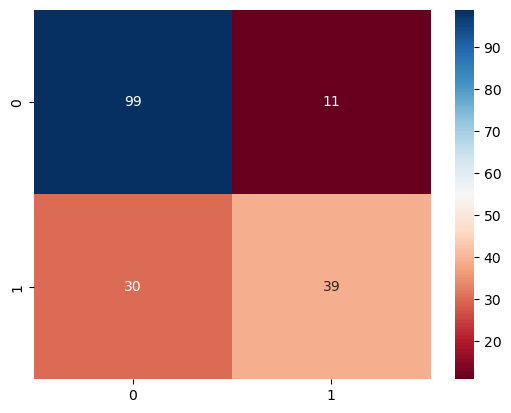

In [35]:
# K Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Score: ", classifier.score(x_train, y_train))
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion matrix: ", sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdBu'))

Score:  0.9845505617977528
Accuracy:  0.8212290502793296
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.84      0.87      0.86       110
         1.0       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion matrix:  Axes(0.125,0.11;0.62x0.77)


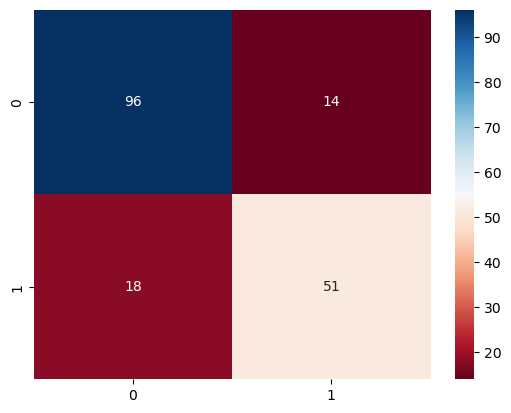

In [41]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state=42)
random_clf.fit(x_train, y_train)
y_pred = random_clf.predict(x_test)
print("Score: ", random_clf.score(x_train, y_train))
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion matrix: ", sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdBu'))

## Voting Classifier - Hard Voting

Score:  0.8623595505617978
Accuracy:  0.7932960893854749
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.77      0.95      0.85       110
         1.0       0.86      0.55      0.67        69

    accuracy                           0.79       179
   macro avg       0.82      0.75      0.76       179
weighted avg       0.81      0.79      0.78       179

Confusion matrix:  Axes(0.125,0.11;0.62x0.77)


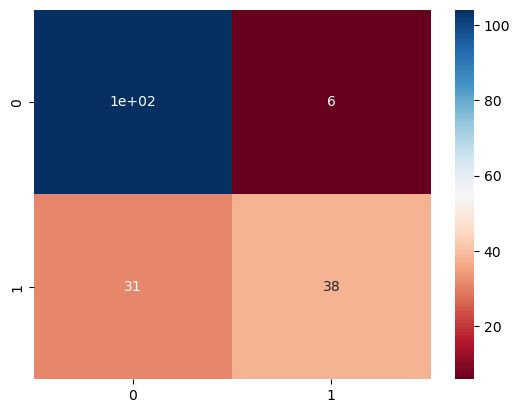

In [47]:
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(C=0.1)
clf2 = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=8,random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=10)
clf4 = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state=42)

voting_hard_clf = VotingClassifier(estimators = [('log_reg', clf1), ('dtree', clf2), ('knn', clf3), ('random_clf', clf4)], voting='hard')
voting_hard_clf.fit(x_train, y_train)
y_predict = voting_hard_clf.predict(x_test)

print("Score: ", voting_hard_clf.score(x_train, y_train))
print("Accuracy: ", accuracy_score(y_test, y_predict))
print("Classification Report: \n", classification_report(y_test, y_predict))
print("Confusion matrix: ", sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, cmap='RdBu'))

## Voting Classifier - Soft Voting

Score:  0.9311797752808989
Accuracy:  0.8156424581005587
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.81      0.91      0.86       110
         1.0       0.82      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179

Confusion matrix:  Axes(0.125,0.11;0.62x0.77)


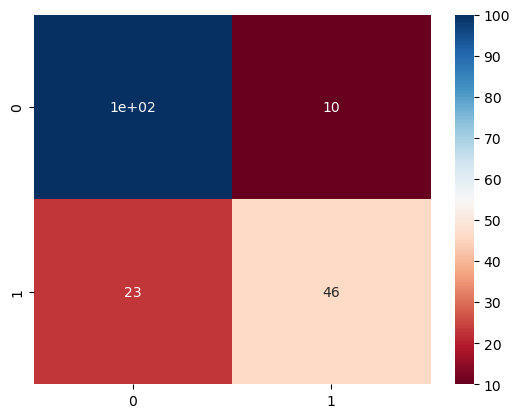

In [52]:
voting_soft_clf = VotingClassifier(estimators = [('log_reg', clf1), ('dtree', clf2), ('knn', clf3), ('random_clf', clf4)], voting='soft', weights=[3,1,2,4])
voting_soft_clf.fit(x_train, y_train)
y_predict = voting_soft_clf.predict(x_test)
print("Score: ", voting_soft_clf.score(x_train, y_train))
print("Accuracy: ", accuracy_score(y_test, y_predict))
print("Classification Report: \n", classification_report(y_test, y_predict))
print("Confusion matrix: ", sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, cmap='RdBu'))

## Stacking Classifier

Score:  0.9311797752808989
Accuracy:  0.8044692737430168
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       110
         1.0       0.81      0.64      0.72        69

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179

Confusion matrix:  Axes(0.125,0.11;0.62x0.77)


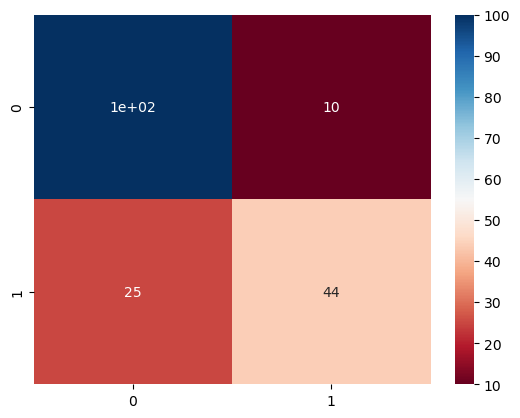

In [54]:
from sklearn.ensemble import StackingClassifier
stack_clf = StackingClassifier(estimators=[('dtree', clf2), ('knn', clf3), ('random_clf', clf4)], final_estimator=LogisticRegression(C=1.0), cv=8)

stack_clf.fit(x_train, y_train)
y_predict = stack_clf.predict(x_test)
print("Score: ", voting_soft_clf.score(x_train, y_train))
print("Accuracy: ", accuracy_score(y_test, y_predict))
print("Classification Report: \n", classification_report(y_test, y_predict))
print("Confusion matrix: ", sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, cmap='RdBu'))

## Conclusion

The comparision of different models for survival prediction is summarised as follows:

| Classifier Name     | Accuracy | Precision | Recall |
|------------------   |----------|---------- |--------|
| Logistic Regression | 78.77    | 78.0      | 77.0   |
| Decision Tree       | 80.44    | 80.0      | 78.0   |
| K Nearest Neighbors | 77.09    | 77.0      | 73.0   |
| Random Forest       | 82.12    | 81.0      | 81.0   |         
| Hard Voting         | 79.32    | 82.0      | 75.0   |
| Soft Voting         | 81.56    | 82.0      | 79.0   |
| Stacking            | 80.44    | 81.0      | 77.0   | 
